<a href="https://colab.research.google.com/github/PriyanshuRao-code/AI-Lab-Project/blob/main/team_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Don't do anything here. It's just a setup.
import os
import sys

repo_name = "AI-Lab-Project"
repo_url = "https://github.com/PriyanshuRao-code/AI-Lab-Project.git"
repo_path = f"/content/{repo_name}"

if os.path.exists(repo_path):
    print("Repository already exists at:", repo_path)
else:
    print("🚀 Cloning the repository...")
    os.system(f"git clone {repo_url}")

os.chdir(repo_path)
sys.path.append(repo_path)

print("Repository is ready to use at:", repo_path)

Repository already exists at: /content/AI-Lab-Project
Repository is ready to use at: /content/AI-Lab-Project


In [3]:
# Using supporting files (now as .ipynb and later .py)

!pip install import-ipynb
import import_ipynb
from team_24_data_preprocessing import *
from team_24_supervised_learning import *

Repository already exists at: /content/AI-Lab-Project
Repository is ready to use at: /content/AI-Lab-Project
Repository already exists at: /content/AI-Lab-Project
Repository is ready to use at: /content/AI-Lab-Project


In [4]:
# Start coding from here

In [22]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
df = pd.read_csv('24.csv')

In [24]:
df_train_orig, df_temp = train_test_split(df, test_size=0.4, random_state=42)
df_valid_orig, df_test_orig = train_test_split(df_temp, test_size=0.5, random_state=42)
df_train_orig.reset_index(drop=True, inplace=True)
df_valid_orig.reset_index(drop=True, inplace=True)
df_test_orig.reset_index(drop=True, inplace=True)

In [42]:
data_preparation_methods = [
    {"outlier": None, "encode": "label", "scale": "minmax", "correlation": False, "pca": False},
    {"outlier": "iqr", "encode": "not-onehot", "scale": "standard", "correlation": True, "pca": False},
    {"outlier": "iqr", "encode": "label", "scale": "standard", "correlation": True, "pca": False},
    {"outlier": "zscore", "encode": "label", "scale": "minmax", "correlation": False, "pca": False},
]

models = {
    "Perceptron": train_model_perceptron,
    "Logistic Regression": train_model_logistic,
    # "KNN": train_model_knn,
    "Gausian": train_model_gaussian,
    "SVC": train_model_svc
}

In [26]:
def data_preparation(df_train, df_valid, df_test, method):

    if method['outlier'] == "iqr":
        df_train, df_valid, df_test = remove_outliers_iqr(df_train, df_valid, df_test)
    elif method['outlier'] == "zscore":
        df_train, df_valid, df_test = remove_outliers_zscore(df_train, df_valid, df_test)


    if method['scale'] == "minmax":
        df_train, df_valid, df_test = normalize_minmax(df_train, df_valid, df_test)
    elif method['scale'] == "standard":
        df_train, df_valid, df_test = standardize_data(df_train, df_valid, df_test)


    if method['correlation']:
        df_train, df_valid, df_test = remove_highly_correlated(df_train, df_valid, df_test)


    if method['pca']:
        df_train, df_valid, df_test = perform_pca(df_train, df_valid, df_test)


    if method['encode'] == "label":
        df_train, df_valid, df_test = label_encode_categorical(df_train, df_valid, df_test)
    elif method['encode'] == "not-onehot":
        df_train, df_valid, df_test = process_splits(df_train, df_valid, df_test, one_hot_encode_month=False)

    return df_train, df_valid, df_test

In [27]:
def evaluate_model(y_true, y_pred):

    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1_score": f1_score(y_true, y_pred, zero_division=0)
    }

In [28]:
results = []

for method in data_preparation_methods:
    df_train, df_valid, df_test = data_preparation(df_train_orig.copy(), df_valid_orig.copy(), df_test_orig.copy(), method)

    for model_name, model_func in models.items():
        model, y_valid, y_test, y_valid_pred, y_test_pred = model_func(df_train, df_valid, df_test)

        metrics_valid = evaluate_model(y_valid, y_valid_pred)
        metrics_test = evaluate_model(y_test, y_test_pred)

        results.append({
            "data_preprocessing_methods": method,
            "model": model_name,
            "valid": metrics_valid,
            "test": metrics_test
        })

# Converting into dataframe
df_results = pd.json_normalize(results, sep='_')

In [29]:
df_results

,model,data_preprocessing_methods_outlier,data_preprocessing_methods_encode,data_preprocessing_methods_scale,data_preprocessing_methods_correlation,data_preprocessing_methods_pca,valid_accuracy,valid_precision,valid_recall,valid_f1_score,test_accuracy,test_precision,test_recall,test_f1_score
0,Perceptron,None,label,minmax,False,False,0.785486,0.169014,0.077922,0.106667,0.792111,0.168675,0.100000,0.125561
1,Logistic Regression,None,label,minmax,False,False,0.835646,0.000000,0.000000,0.000000,0.850746,0.000000,0.000000,0.000000
2,Gausian,None,label,minmax,False,False,0.911419,0.691892,0.831169,0.755162,0.911514,0.662857,0.828571,0.736508
3,SVC,None,label,minmax,False,False,0.914621,0.722892,0.779221,0.750000,0.940299,0.776316,0.842857,0.808219
4,Perceptron,iqr,not-onehot,standard,True,False,0.692636,0.091463,0.097403,0.094340,0.727079,0.085714,0.085714,0.085714
5,Logistic Regression,iqr,not-onehot,standard,True,False,0.955176,0.917910,0.798701,0.854167,0.954158,0.907563,0.771429,0.833977
6,Gausian,iqr,not-onehot,standard,True,False,0.872999,0.575107,0.870130,0.692506,0.878465,0.561321,0.850000,0.676136
7,SVC,iqr,not-onehot,standard,True,False,0.954109,0.905109,0.805195,0.852234,0.955224,0.929825,0.757143,0.834646
8,Perceptron,iqr,label,standard,True,False,0.814301,0.222222,0.051948,0.084211,0.815565,0.076923,0.021429,0.033520
9,Logistic Regression,iqr,label,standard,True,False,0.842049,0.513636,0.733766,0.604278,0.842217,0.481308,0.735714,0.581921


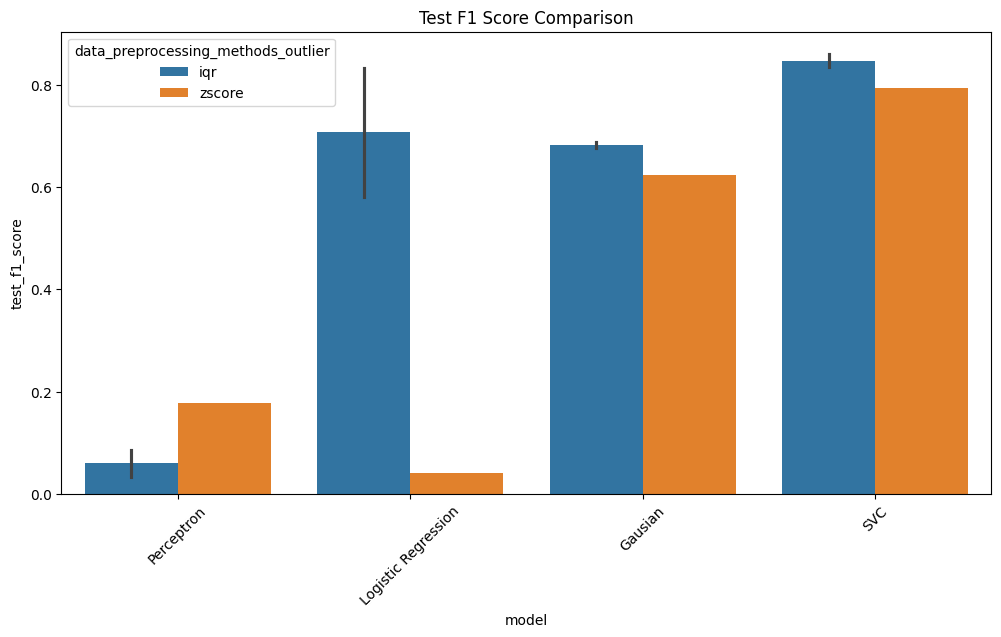

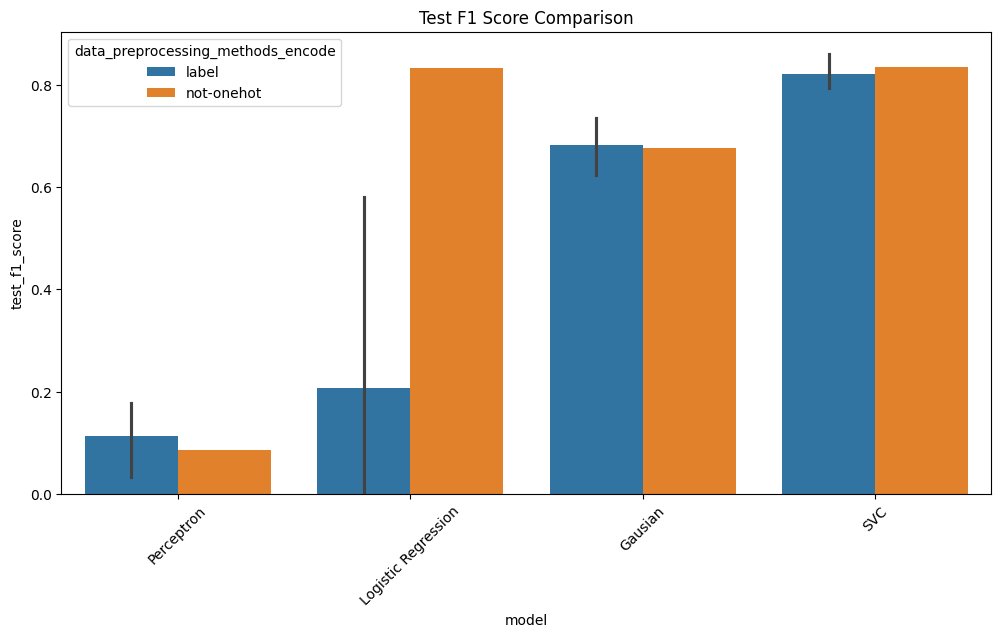

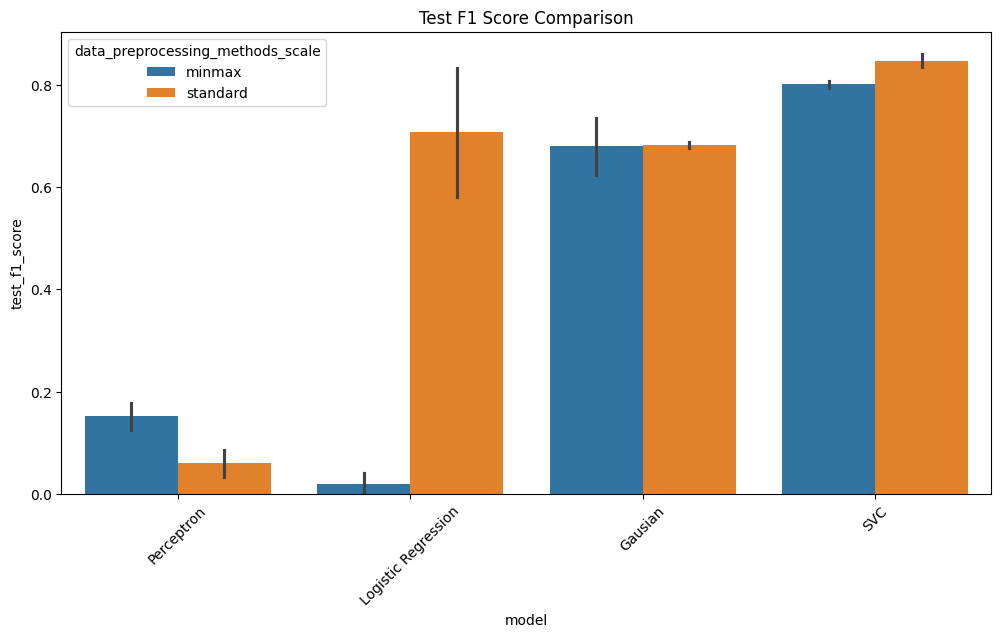

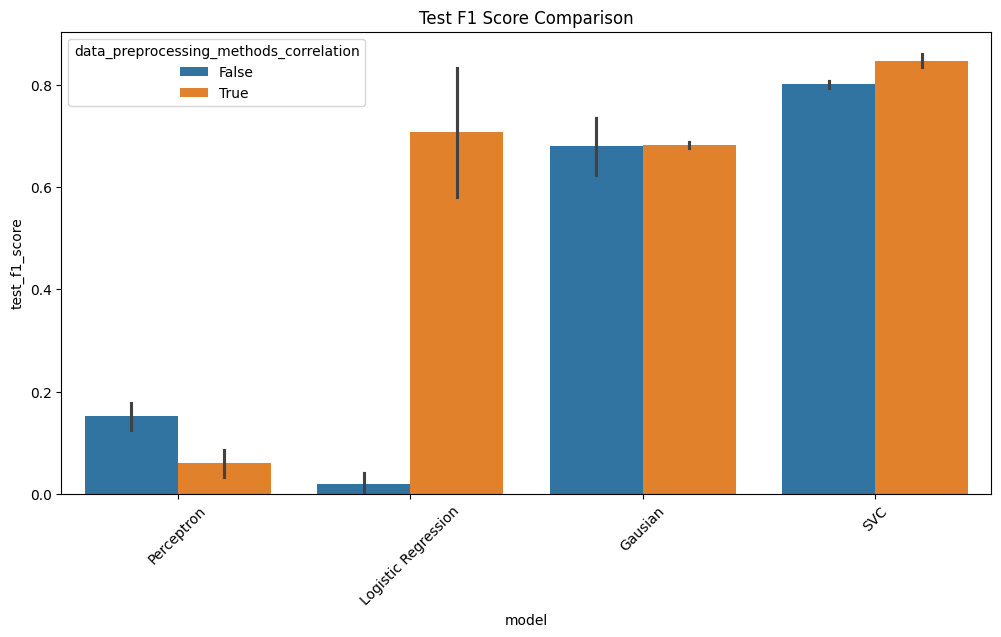

In [37]:
# Bar Plot


plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_f1_score', hue='data_preprocessing_methods_outlier')
plt.xticks(rotation=45)
plt.title("Test F1 Score Comparison")
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_f1_score', hue='data_preprocessing_methods_encode')
plt.xticks(rotation=45)
plt.title("Test F1 Score Comparison")
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_f1_score', hue='data_preprocessing_methods_scale')
plt.xticks(rotation=45)
plt.title("Test F1 Score Comparison")
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_f1_score', hue='data_preprocessing_methods_correlation')
plt.xticks(rotation=45)
plt.title("Test F1 Score Comparison")
plt.show()

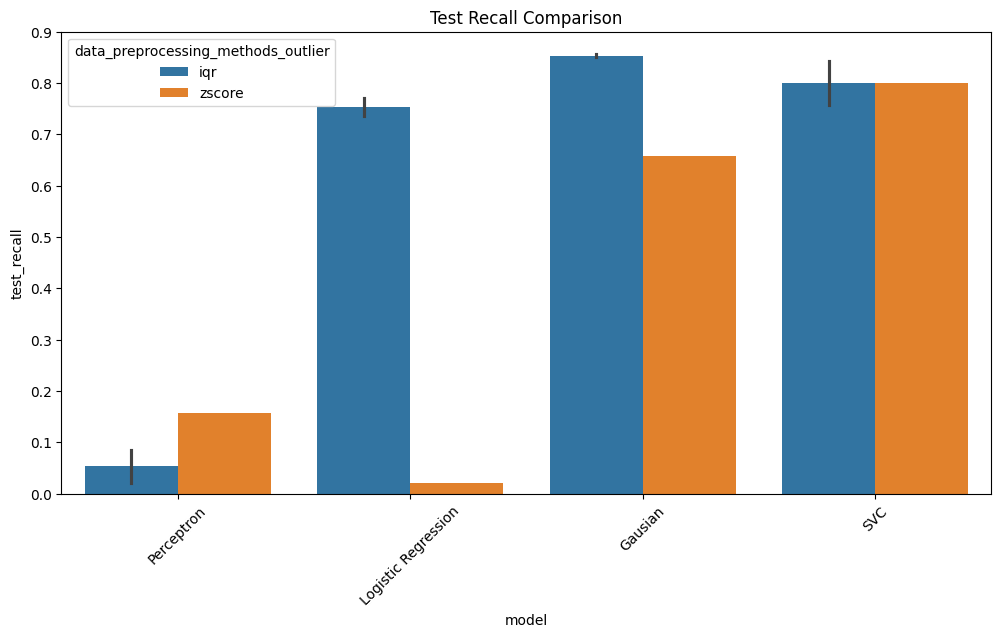

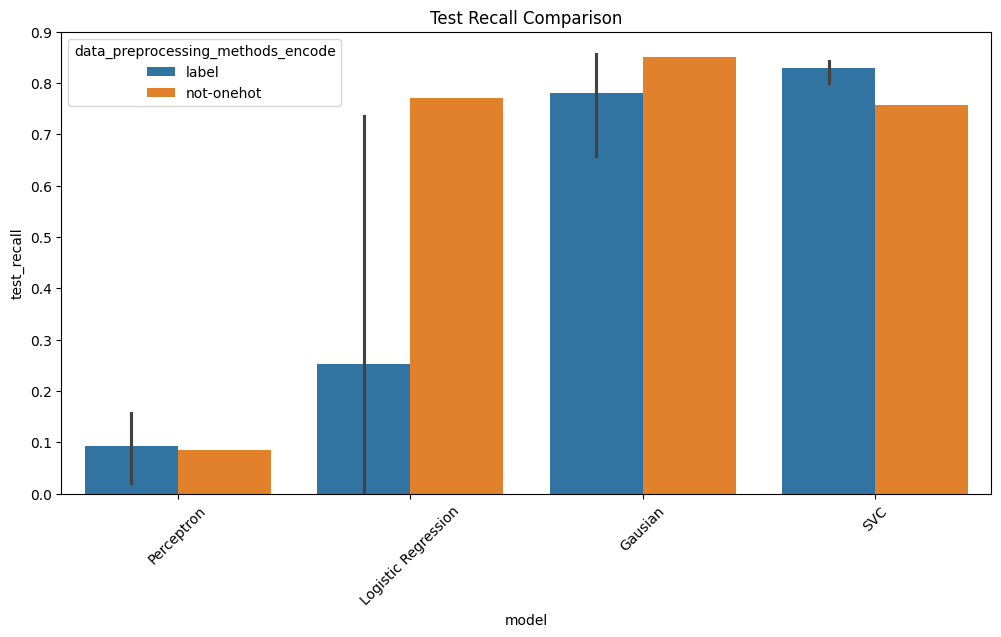

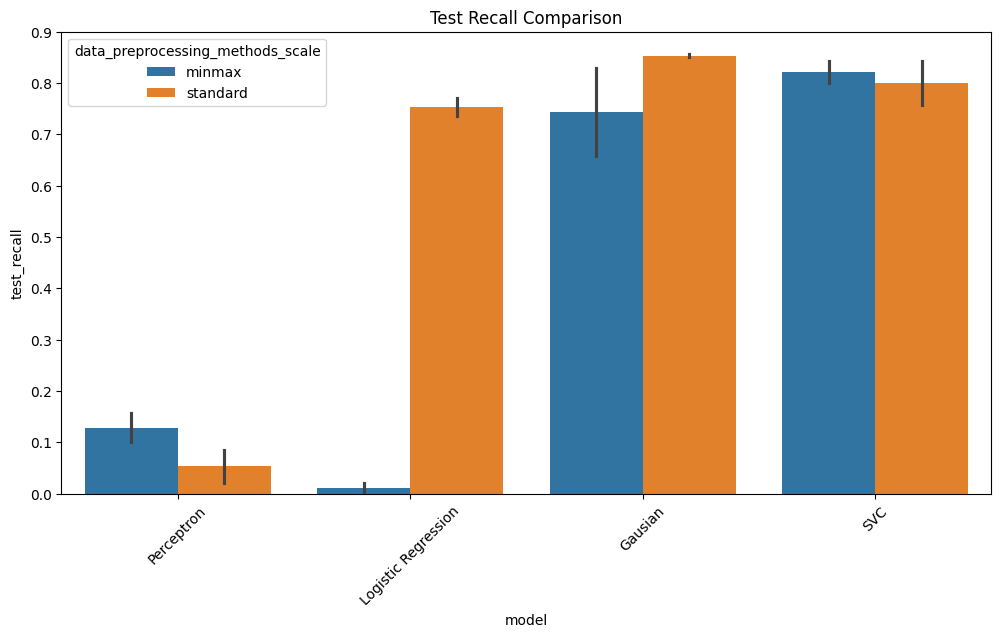

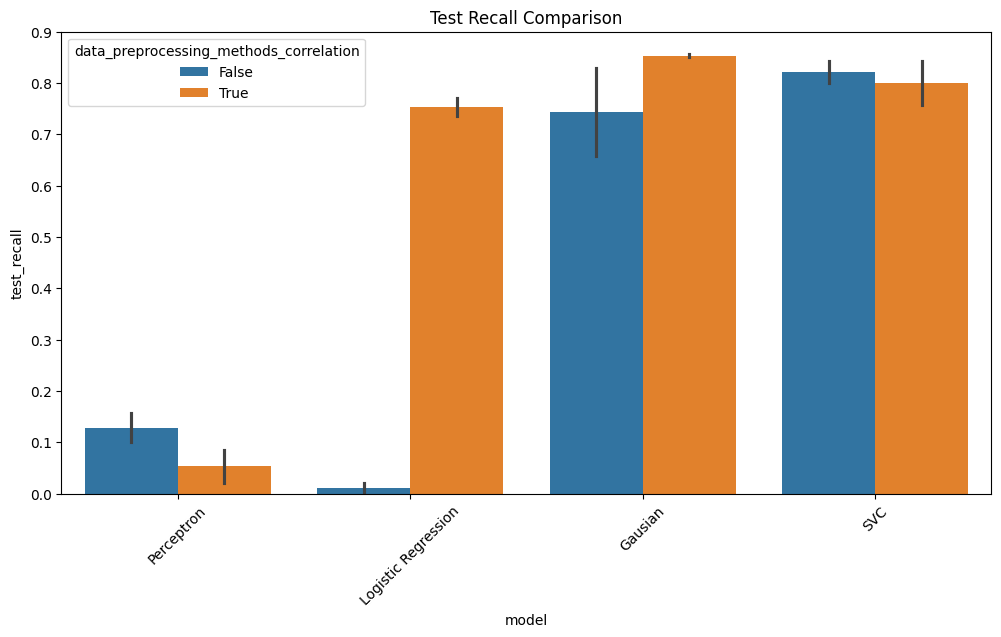

In [38]:
# Bar Plot
plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_recall', hue='data_preprocessing_methods_outlier')
plt.xticks(rotation=45)
plt.title("Test Recall Comparison")
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_recall', hue='data_preprocessing_methods_encode')
plt.xticks(rotation=45)
plt.title("Test Recall Comparison")
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_recall', hue='data_preprocessing_methods_scale')
plt.xticks(rotation=45)
plt.title("Test Recall Comparison")
plt.show()



plt.figure(figsize=(12,6))
sns.barplot(data=df_results, x='model', y='test_recall', hue='data_preprocessing_methods_correlation')
plt.xticks(rotation=45)
plt.title("Test Recall Comparison")
plt.show()

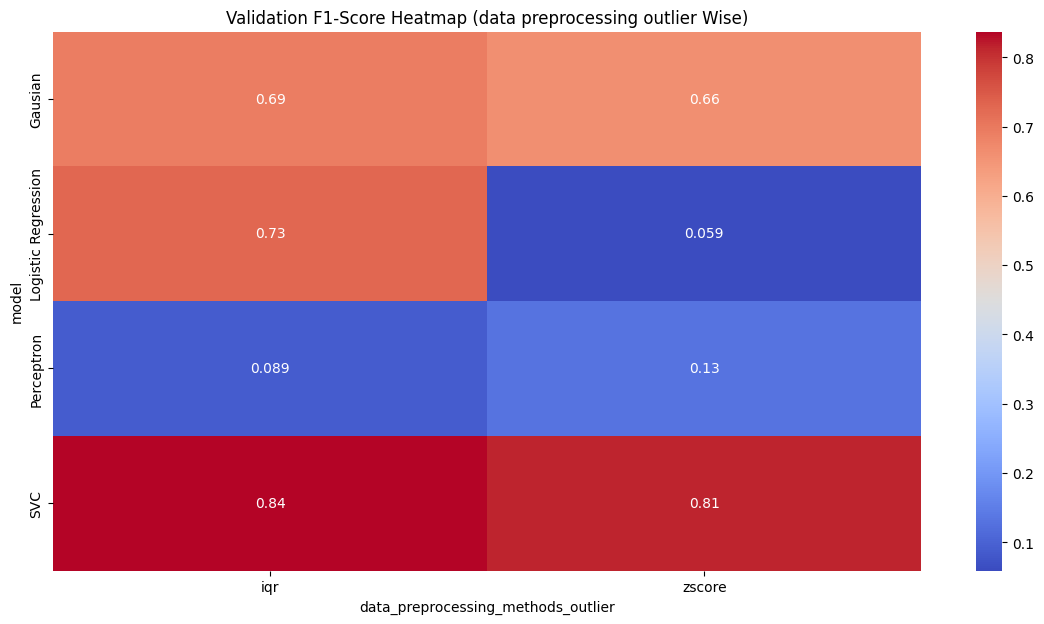

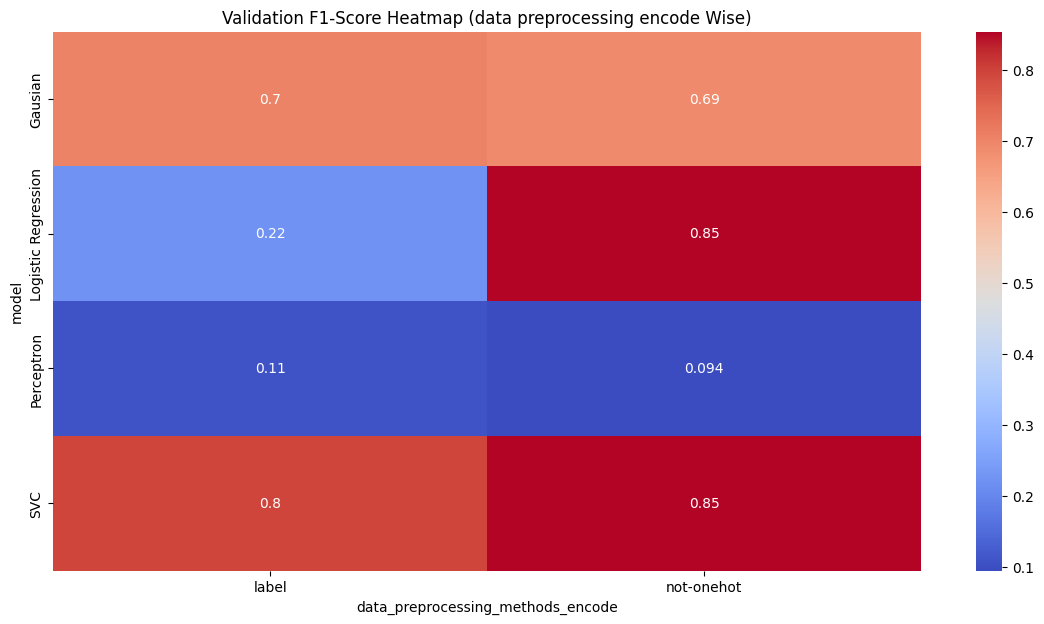

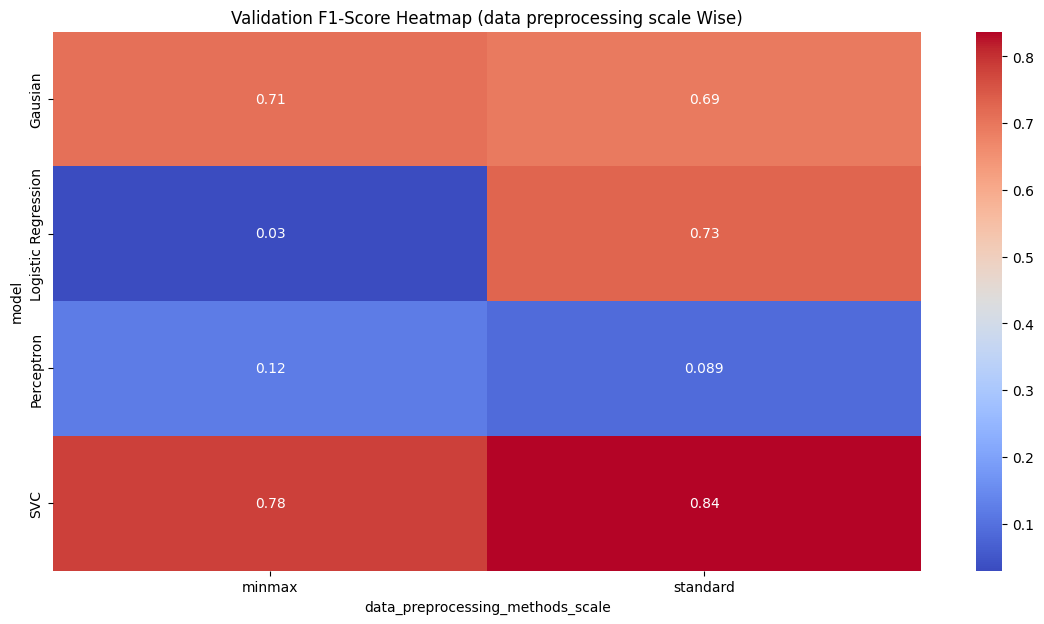

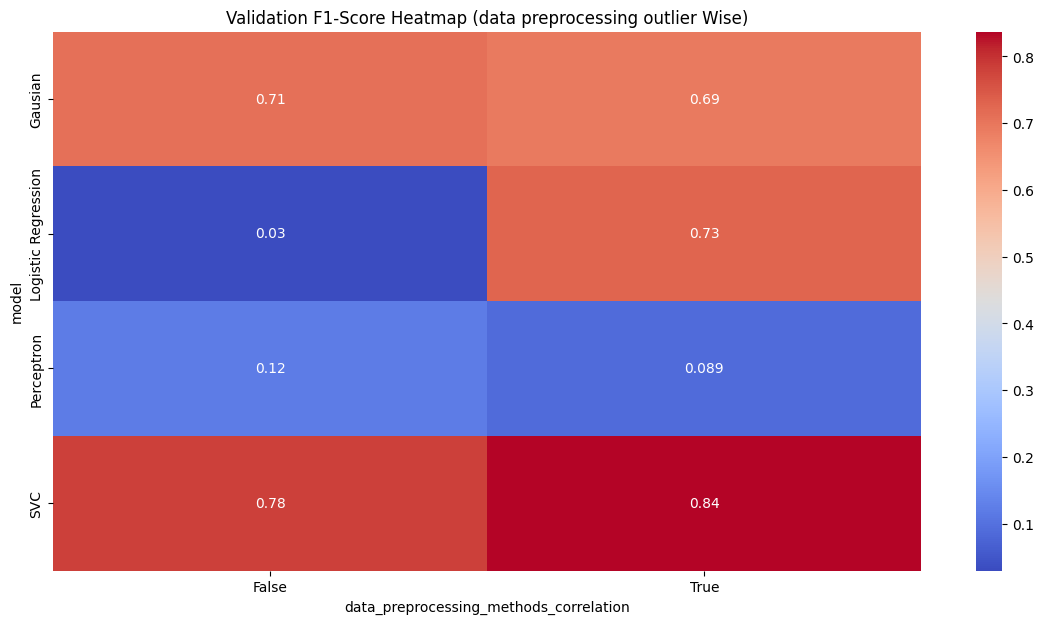

In [39]:
# Heatmap

pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_outlier', values='valid_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Validation F1-Score Heatmap (data preprocessing outlier Wise)")
plt.show()


pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_encode', values='valid_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Validation F1-Score Heatmap (data preprocessing encode Wise)")
plt.show()

pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_scale', values='valid_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Validation F1-Score Heatmap (data preprocessing scale Wise)")
plt.show()

pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_correlation', values='valid_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Validation F1-Score Heatmap (data preprocessing outlier Wise)")
plt.show()

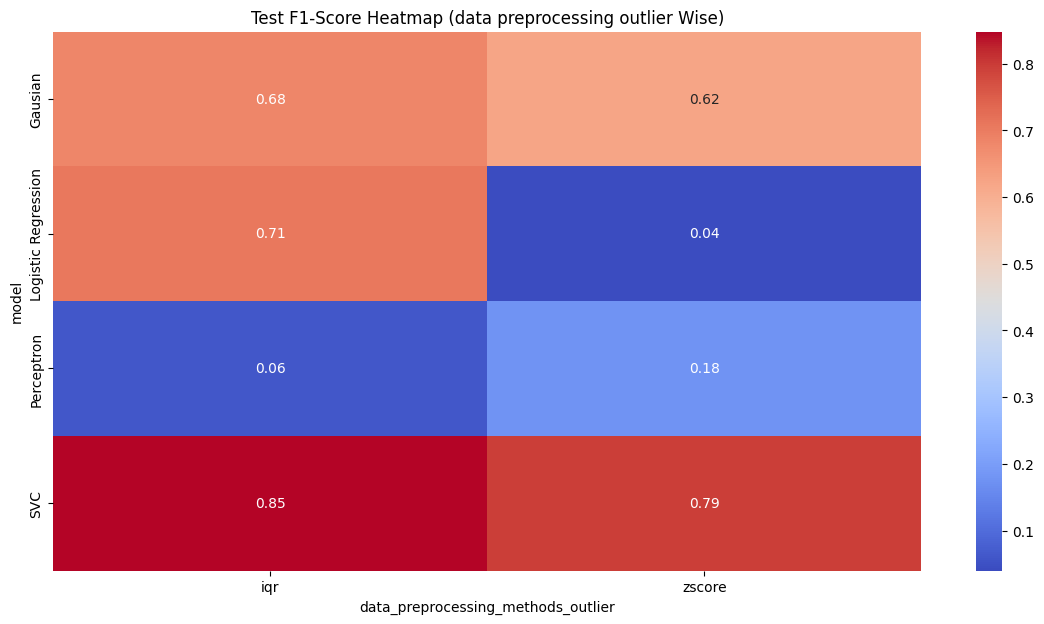

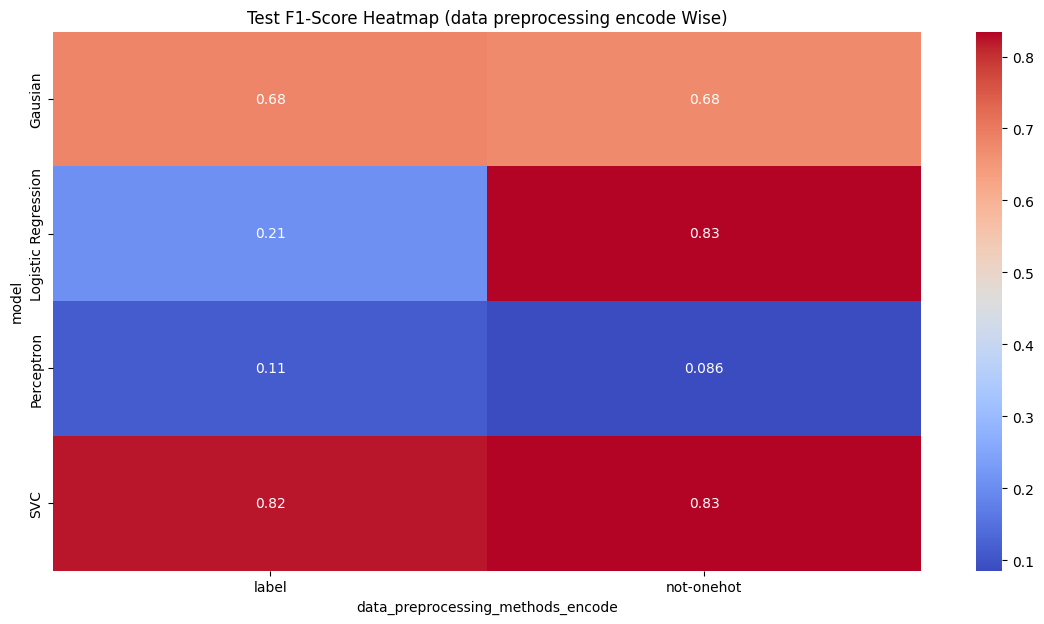

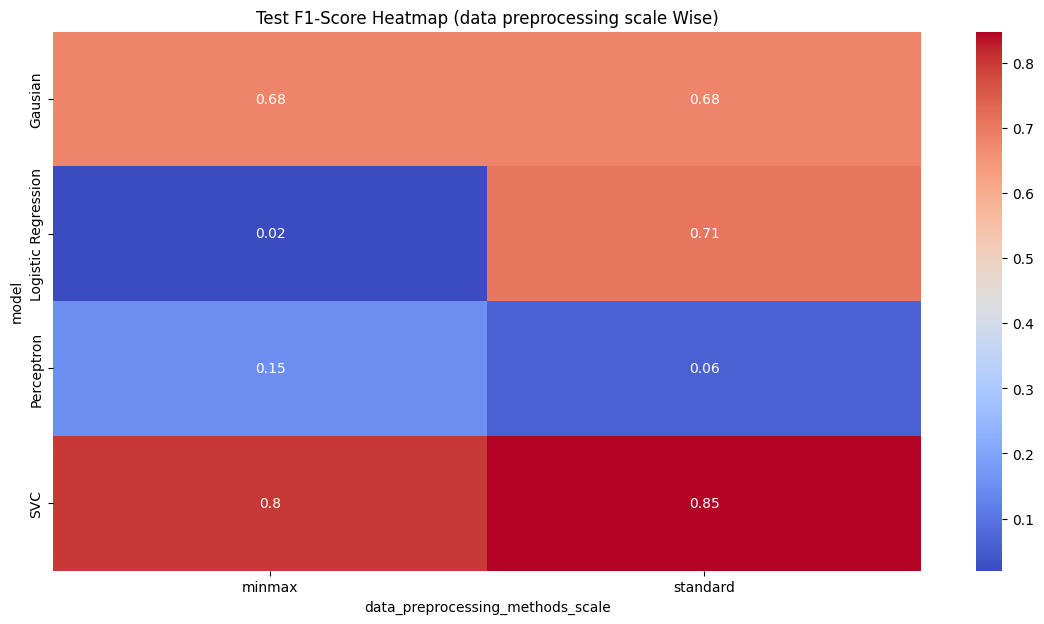

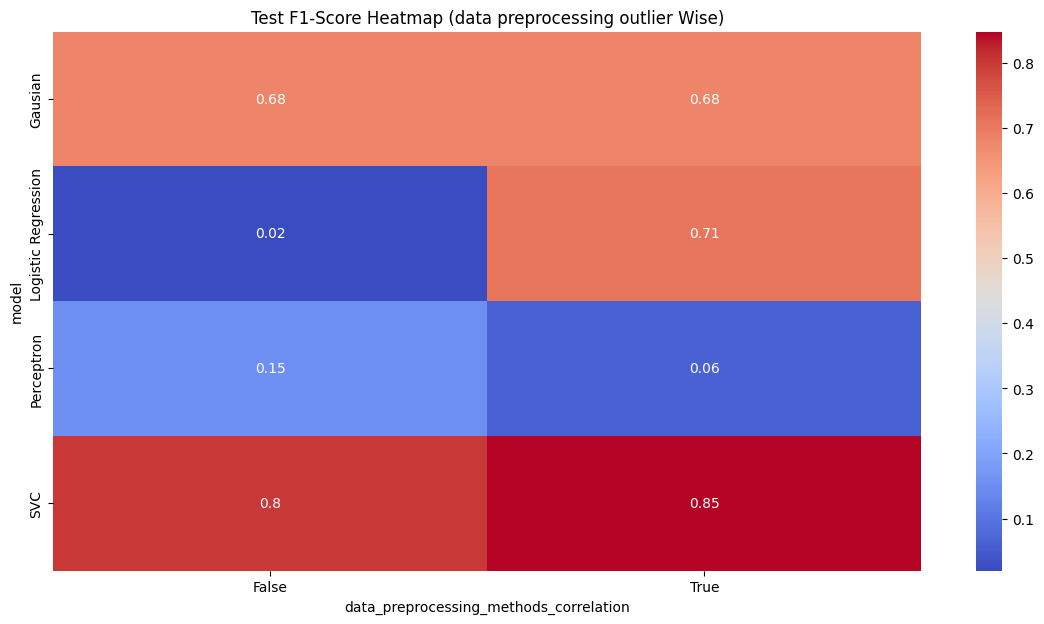

In [40]:
# Heatmap

pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_outlier', values='test_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Test F1-Score Heatmap (data preprocessing outlier Wise)")
plt.show()


pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_encode', values='test_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Test F1-Score Heatmap (data preprocessing encode Wise)")
plt.show()

pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_scale', values='test_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Test F1-Score Heatmap (data preprocessing scale Wise)")
plt.show()

pivot = df_results.pivot_table(index='model', columns='data_preprocessing_methods_correlation', values='test_f1_score', aggfunc='mean')
plt.figure(figsize=(14,7))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title("Test F1-Score Heatmap (data preprocessing outlier Wise)")
plt.show()

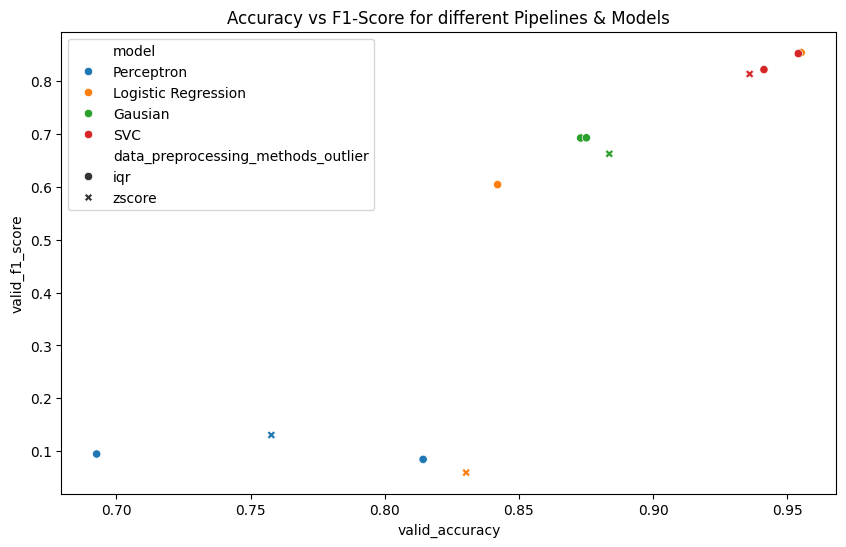

In [41]:
# Scatter Plot


plt.figure(figsize=(10,6))
sns.scatterplot(data=df_results, x='valid_accuracy', y='valid_f1_score', hue='model', style='data_preprocessing_methods_outlier')
plt.title("Accuracy vs F1-Score for different Pipelines & Models")
plt.show()